# First Hierarachial level: Order

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, balanced_accuracy_score, roc_auc_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, PrecisionRecallDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

from skopt.utils import use_named_args

from xgboost import XGBClassifier, callback
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Integer, Real
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score

from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier



In [2]:
# Load the dataset
file_path = '/kaggle/input/birdclef/preprocessed_data.csv'
df = pd.read_csv(file_path)

# 'Order' is the main target for stratified splitting at the top level
target_column = 'Order'

# First split: Train (70%) and Temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df[target_column], random_state=42)
# Second split: Temp (30%) into Validation (15%) and Test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df[target_column], random_state=42)


# Print the sizes to verify the splits
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# Optionally, save the splits to separate CSV files if needed
#train_df.to_csv('/kaggle/working/train_data.csv', index=False)
#test_df.to_csv('/kaggle/working/test_data.csv', index=False)


Train set size: 8825
Validation set size: 1891
Test set size: 1892


In [3]:
# Load the dataset
file_path = '/kaggle/input/birdclef/extra_preprocessed_data.csv'
df = pd.read_csv(file_path)

# 'Order' is the main target for stratified splitting at the top level
target_column = 'Order'

# First split: Train (70%) and Temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df[target_column], random_state=42)
# Second split: Temp (30%) into Validation (15%) and Test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df[target_column], random_state=42)


# Print the sizes to verify the splits
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")


Train set size: 8825
Validation set size: 1891
Test set size: 1892


In [4]:
# List of columns to analyze
columns_to_analyze = ['Order']

# Function to analyze each column
def analyze_column(df, column_name):
    print(f"\nColumn: {column_name}")
    
    # Total number of unique values
    unique_values = df[column_name].nunique()
    print(f"Total number of unique values: {unique_values}")
    
    # Number of missing values
    missing_values = df[column_name].isnull().sum()
    print(f"Number of missing values: {missing_values}")
    
    # Count of occurrences for each unique value
    value_counts = df[column_name].value_counts()
    print(f"\nCount of occurrences for each unique value:\n{value_counts}")

# Analyze each column in the list
for column in columns_to_analyze:
    analyze_column(test_df, column)
    


Column: Order
Total number of unique values: 17
Number of missing values: 0

Count of occurrences for each unique value:
Order
8     501
2     442
1     357
6     113
9      95
15     81
13     63
3      59
7      46
0      32
5      31
11     22
12     16
16     14
4      11
10      7
14      2
Name: count, dtype: int64


Testing Model: 100%|██████████| 1892/1892 [00:00<00:00, 19953.79it/s]


Test F1 Macro Score:  0.5272111780282882
Balanced Accuracy Score:  0.5859479786184298
ROC-AUC Score:  0.779347501094824
PRC-AUC Score:  0.32743435179459646


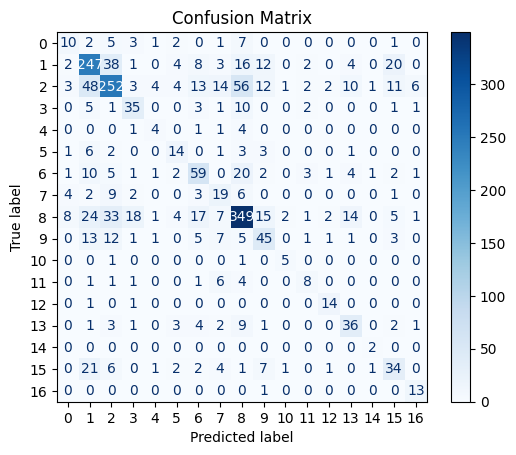

In [13]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

# Prepare test data
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Initialize progress bar for testing
with tqdm(total=len(X_test), desc="Testing Model") as test_pbar:
    y_pred = best_model.predict(X_test)
    test_pbar.update(len(X_test))

# Calculate and print the test F1 score
test_f1_score = f1_score(y_test, y_pred, average='macro')
print("Test F1 Macro Score: ", test_f1_score)

# Calculate and print additional metrics
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score: ", balanced_acc)

# Binarize the test labels for multi-class AUC calculations
y_test_bin = label_binarize(y_test, classes=range(17))
y_pred_bin = label_binarize(y_pred, classes=range(17))

# Calculate and print ROC-AUC score (one-vs-rest)
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Calculate and print PRC-AUC score (one-vs-rest)
prc_auc = average_precision_score(y_test_bin, y_pred_bin, average='macro')
print("PRC-AUC Score: ", prc_auc)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [5]:
# Define feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or
                   col.startswith('zcr') or col.startswith('delta') or 
                   col.startswith('rms') or col in ['x', 'y', 'z' ]]

target_column = 'Order'

# Split into features and target
X_train = train_df[feature_columns]
y_train = train_df[target_column]

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter space for Bayesian Optimization
param_space = {
    'max_depth': Integer(5, 20),
    'n_estimators': Integer(100, 600),
    'subsample': Real(0.3, 1.0),
    'gamma': Real(0, 0.5)
}

# Initialize the base XGBClassifier model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=17,  # Number of classes
    tree_method='hist',  # Efficient tree method
    use_label_encoder=False,  # To avoid unnecessary label encoding warnings
    eval_metric='mlogloss'  # Evaluation metric
)

# Set up Bayesian Optimization with BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='f1_macro',  # Use F1 macro to handle the imbalanced classes
    cv=3,
    n_iter=30,  # Increase for more comprehensive search
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and score
print("Best parameters found: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [7]:
# Create the best model with early stopping
best_model = xgb.XGBClassifier(
    **bayes_search.best_params_,  # Unpack the best parameters
    objective='multi:softmax',
    num_class=17,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='mlogloss',
    early_stopping_rounds=10  # Early stopping to prevent overfitting
)

# Prepare validation data
X_val = val_df[feature_columns]
y_val = val_df[target_column]
evals = [(X_val, y_val)]

# Train the model with early stopping and verbose output
best_model.fit(
    X_train_smote, y_train_smote,
    eval_set=evals,
    verbose=True  # This will print the progress
)


[0]	validation_0-mlogloss:2.36911
[1]	validation_0-mlogloss:2.16596
[2]	validation_0-mlogloss:2.01668
[3]	validation_0-mlogloss:1.90094
[4]	validation_0-mlogloss:1.80482
[5]	validation_0-mlogloss:1.72511
[6]	validation_0-mlogloss:1.65012
[7]	validation_0-mlogloss:1.58843
[8]	validation_0-mlogloss:1.53656
[9]	validation_0-mlogloss:1.49218
[10]	validation_0-mlogloss:1.44896
[11]	validation_0-mlogloss:1.40897
[12]	validation_0-mlogloss:1.37448
[13]	validation_0-mlogloss:1.33847
[14]	validation_0-mlogloss:1.31064
[15]	validation_0-mlogloss:1.28192
[16]	validation_0-mlogloss:1.26169
[17]	validation_0-mlogloss:1.23950
[18]	validation_0-mlogloss:1.21785
[19]	validation_0-mlogloss:1.20201
[20]	validation_0-mlogloss:1.18657
[21]	validation_0-mlogloss:1.17129
[22]	validation_0-mlogloss:1.15268
[23]	validation_0-mlogloss:1.13947
[24]	validation_0-mlogloss:1.12692
[25]	validation_0-mlogloss:1.11535
[26]	validation_0-mlogloss:1.10484
[27]	validation_0-mlogloss:1.09410
[28]	validation_0-mlogloss:1.0

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=529,
              n_jobs=None, num_class=17, num_parallel_tree=None, ...)

Testing Model: 100%|██████████| 1892/1892 [00:00<00:00, 43725.33it/s]


Test F1 Macro Score:  0.6441656397263543
Balanced Accuracy Score:  0.6385320992308609
ROC-AUC Score:  0.8094756906687034
PRC-AUC Score:  0.4610555927712472


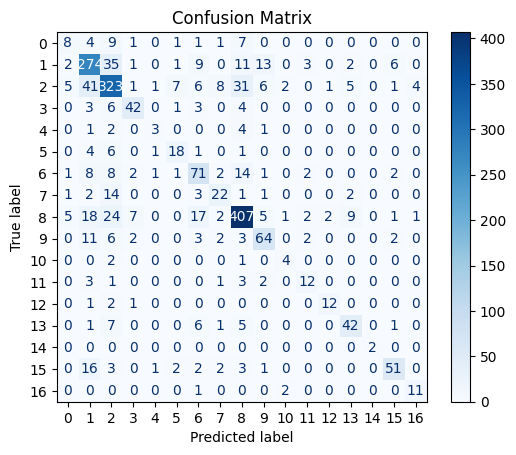

In [8]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

# Prepare test data
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Initialize progress bar for testing
with tqdm(total=len(X_test), desc="Testing Model") as test_pbar:
    y_pred = best_model.predict(X_test)
    test_pbar.update(len(X_test))

# Calculate and print the test F1 score
test_f1_score = f1_score(y_test, y_pred, average='macro')
print("Test F1 Macro Score: ", test_f1_score)

# Calculate and print additional metrics
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score: ", balanced_acc)

# Binarize the test labels for multi-class AUC calculations
y_test_bin = label_binarize(y_test, classes=range(17))
y_pred_bin = label_binarize(y_pred, classes=range(17))

# Calculate and print ROC-AUC score (one-vs-rest)
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Calculate and print PRC-AUC score (one-vs-rest)
prc_auc = average_precision_score(y_test_bin, y_pred_bin, average='macro')
print("PRC-AUC Score: ", prc_auc)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [6]:
# Define feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or 
                   col in ['zcr_mean', 'x', 'y', 'z']]
target_column = 'Order'

# Split into features and target
X_train = train_df[feature_columns]
y_train = train_df[target_column]

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter space for Bayesian Optimization
param_space = {
    'max_depth': Integer(5, 20),
    'n_estimators': Integer(100, 600),
    'subsample': Real(0.3, 1.0),
    'gamma': Real(0, 0.5)
}

# Initialize the base XGBClassifier model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=17,  # Number of classes
    tree_method='hist',  # Efficient tree method
    use_label_encoder=False,  # To avoid unnecessary label encoding warnings
    eval_metric='mlogloss'  # Evaluation metric
)

# Set up Bayesian Optimization with BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='f1_macro',  # Use F1 macro to handle the imbalanced classes
    cv=3,
    n_iter=30,  # Increase for more comprehensive search
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and score
print("Best parameters found: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [9]:
# Create the best model with early stopping
best_model = xgb.XGBClassifier(
    **best_params,  # Unpack the best parameters
    objective='multi:softmax',
    num_class=17,
    tree_method='hist',
    use_label_encoder=False,
    eval_metric='mlogloss',
    early_stopping_rounds=10  # Early stopping to prevent overfitting
)

# Prepare validation data
X_val = val_df[feature_columns]
y_val = val_df[target_column]
evals = [(X_val, y_val)]

# Train the model with early stopping and verbose output
best_model.fit(
    X_train_smote, y_train_smote,
    eval_set=evals,
    verbose=True  # This will print the progress
)


[0]	validation_0-mlogloss:2.48303
[1]	validation_0-mlogloss:2.32983
[2]	validation_0-mlogloss:2.20742
[3]	validation_0-mlogloss:2.11798
[4]	validation_0-mlogloss:2.03575
[5]	validation_0-mlogloss:1.97044
[6]	validation_0-mlogloss:1.91765
[7]	validation_0-mlogloss:1.87003
[8]	validation_0-mlogloss:1.83363
[9]	validation_0-mlogloss:1.80061
[10]	validation_0-mlogloss:1.76646
[11]	validation_0-mlogloss:1.73806
[12]	validation_0-mlogloss:1.71502
[13]	validation_0-mlogloss:1.69379
[14]	validation_0-mlogloss:1.67185
[15]	validation_0-mlogloss:1.65403
[16]	validation_0-mlogloss:1.63802
[17]	validation_0-mlogloss:1.62218
[18]	validation_0-mlogloss:1.60547
[19]	validation_0-mlogloss:1.59115
[20]	validation_0-mlogloss:1.58077
[21]	validation_0-mlogloss:1.56642
[22]	validation_0-mlogloss:1.55524
[23]	validation_0-mlogloss:1.54351
[24]	validation_0-mlogloss:1.53441
[25]	validation_0-mlogloss:1.52124
[26]	validation_0-mlogloss:1.50948
[27]	validation_0-mlogloss:1.49815
[28]	validation_0-mlogloss:1.4

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=498,
              n_jobs=None, num_class=17, num_parallel_tree=None, ...)

In [10]:
best_model = bayes_search.best_estimator_

# Prepare test data
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Evaluate on the test set with tqdm
with tqdm(total=len(X_test), desc="Testing Model") as test_pbar:
    y_pred = best_model.predict(X_test)
    test_pbar.update(len(X_test))

# Calculate and print the test F1 score
test_f1_score = f1_score(y_test, y_pred, average='macro')
print("Test F1 Macro Score: ", test_f1_score)


Testing Model: 100%|██████████| 1892/1892 [00:00<00:00, 14828.64it/s]

Test F1 Macro Score:  0.5381417604008462


Testing Model: 100%|██████████| 1892/1892 [00:00<00:00, 15816.02it/s]


Test F1 Macro Score:  0.5381417604008462
Balanced Accuracy Score:  0.5694135428189872
ROC-AUC Score:  0.7710470150811224
PRC-AUC Score:  0.33714442384723997


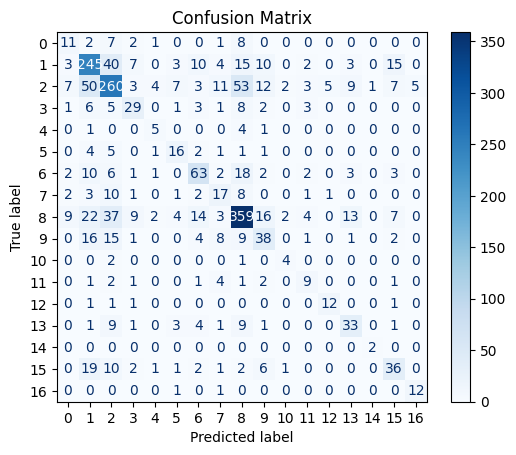

<Figure size 1000x800 with 0 Axes>

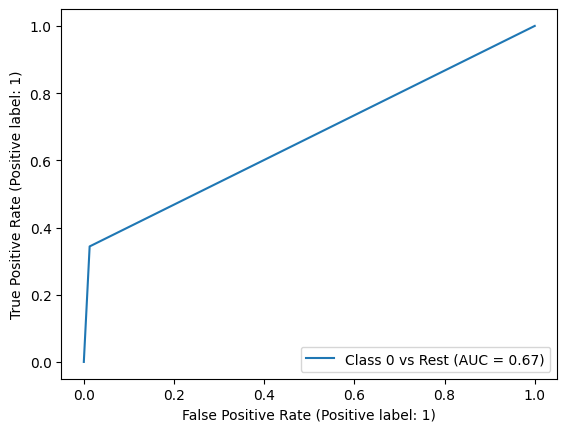

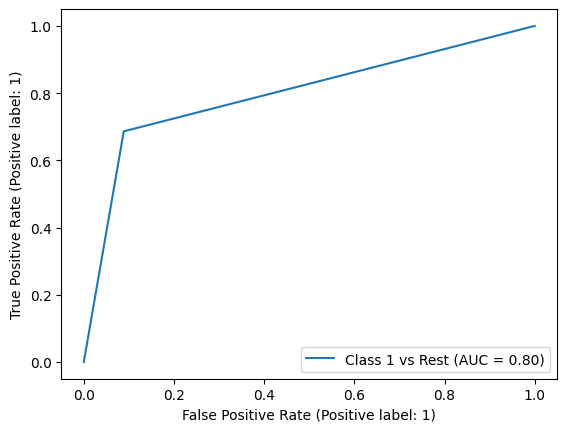

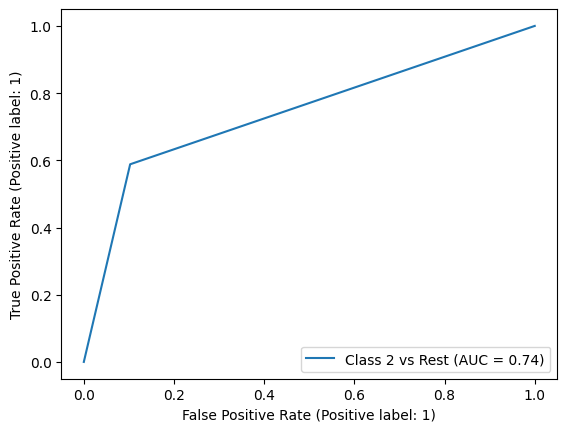

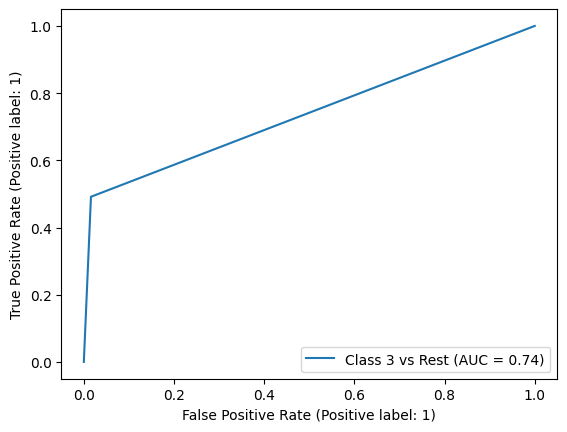

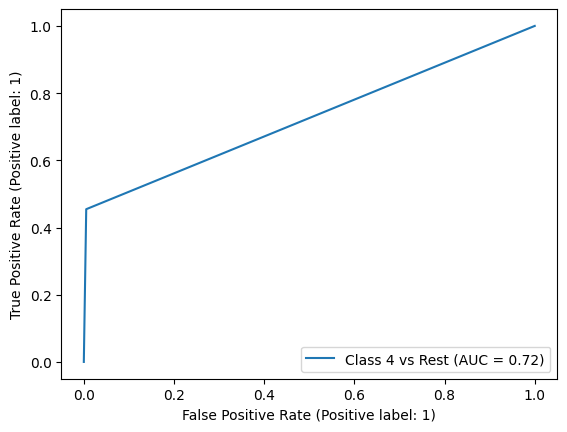

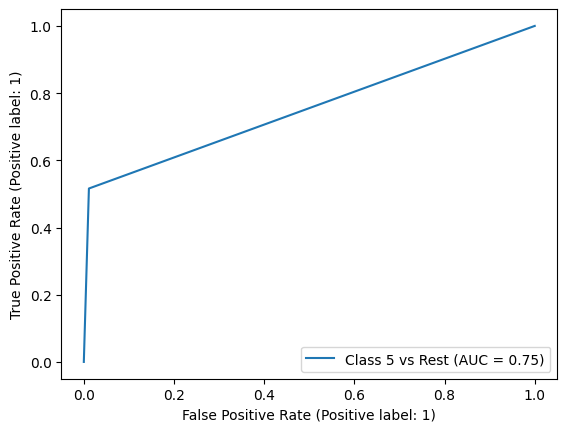

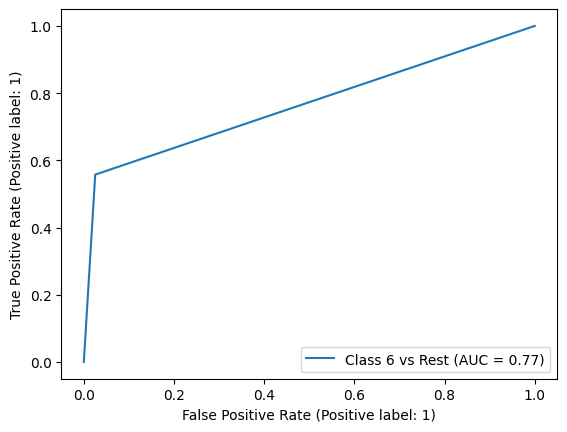

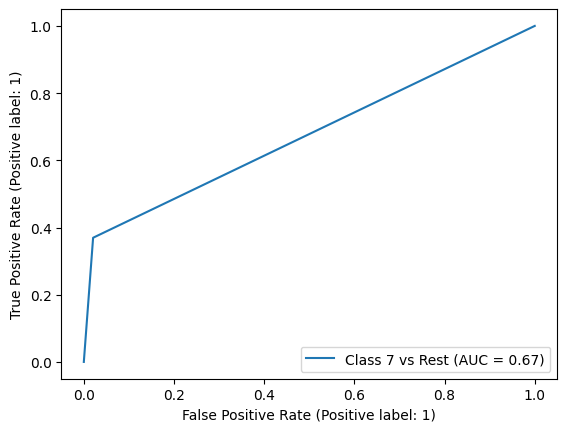

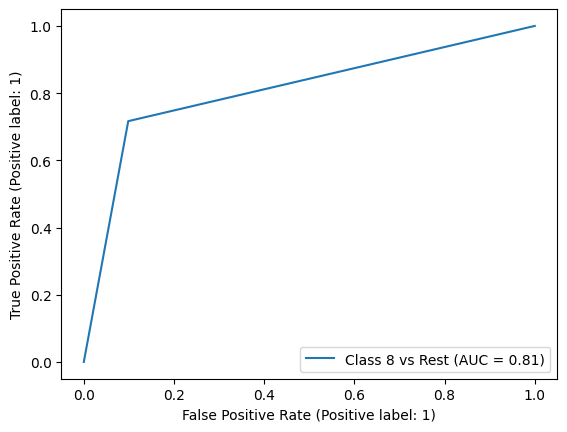

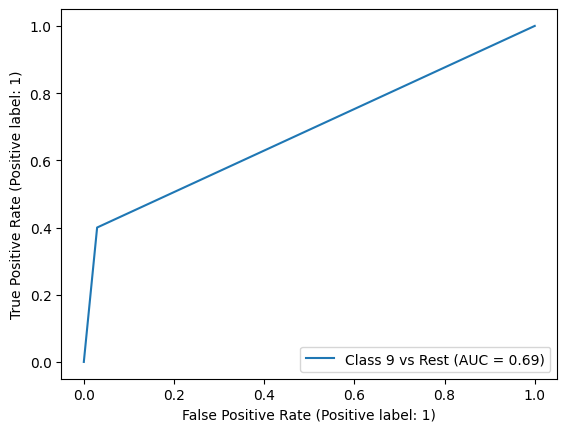

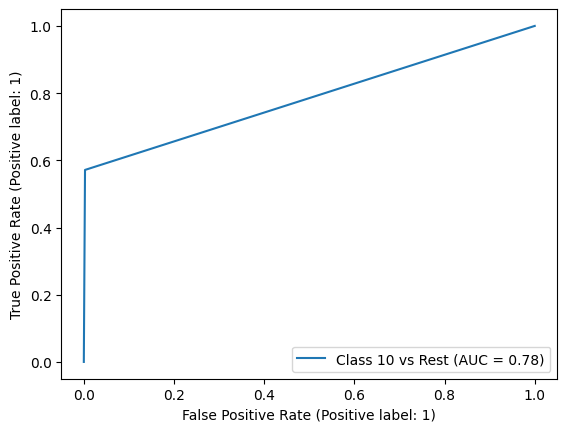

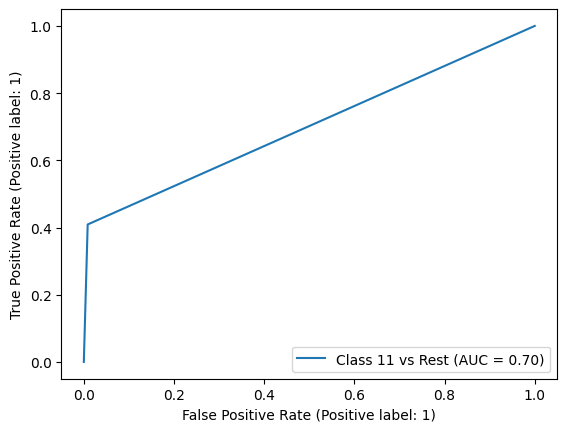

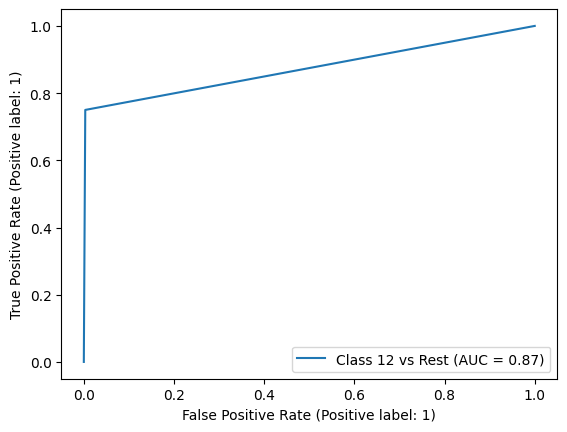

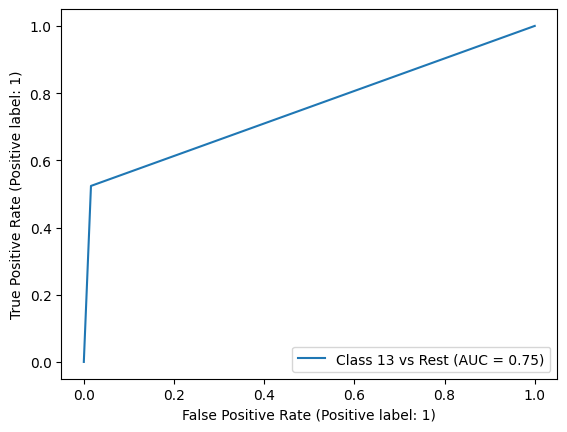

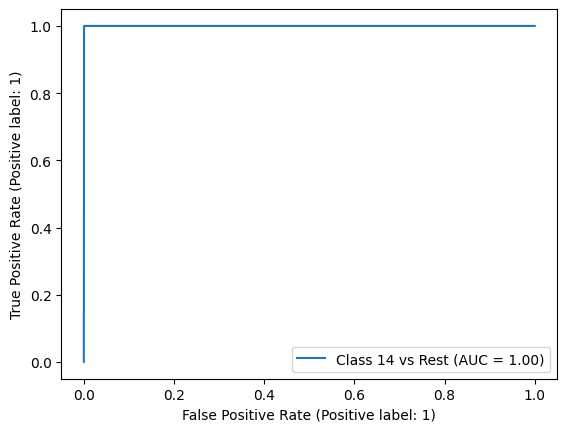

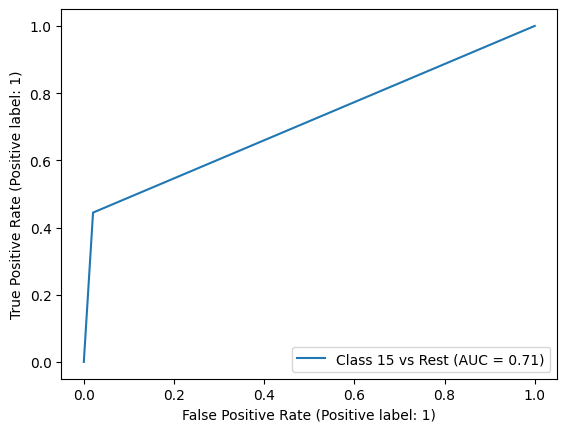

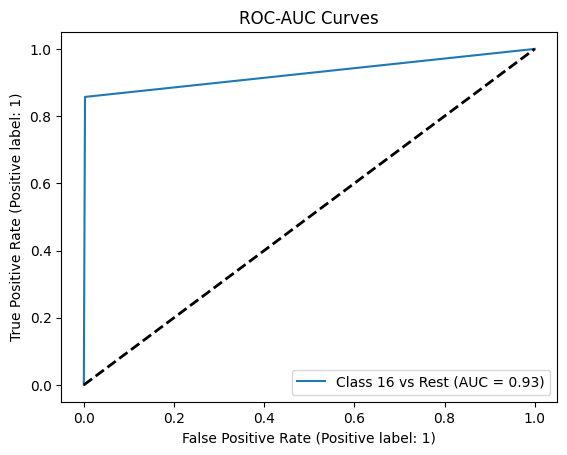

<Figure size 1000x800 with 0 Axes>

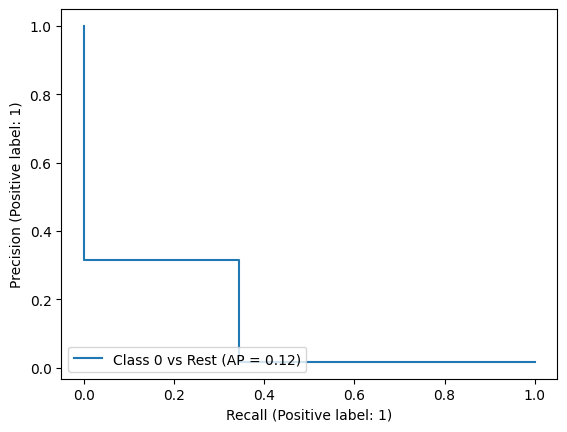

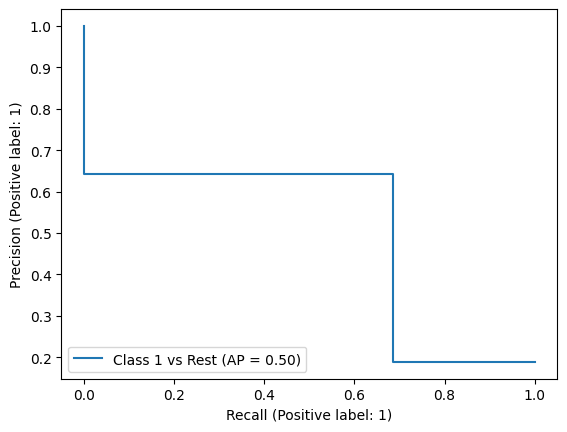

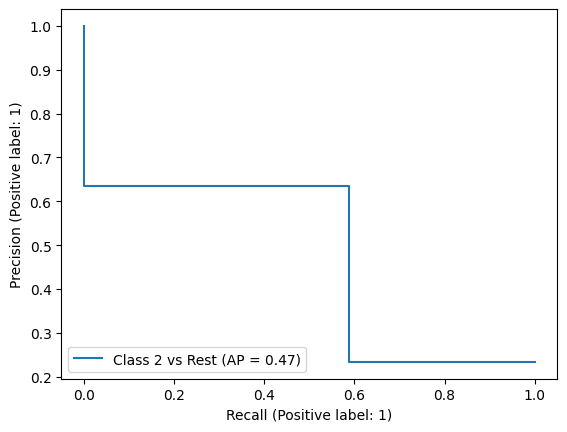

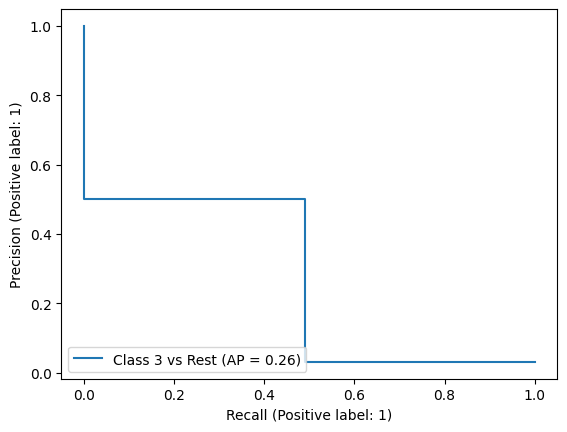

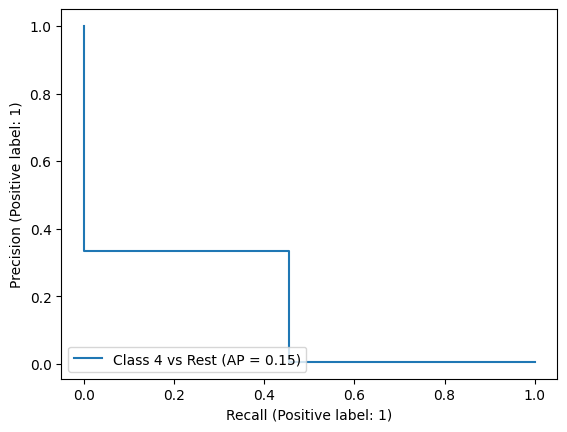

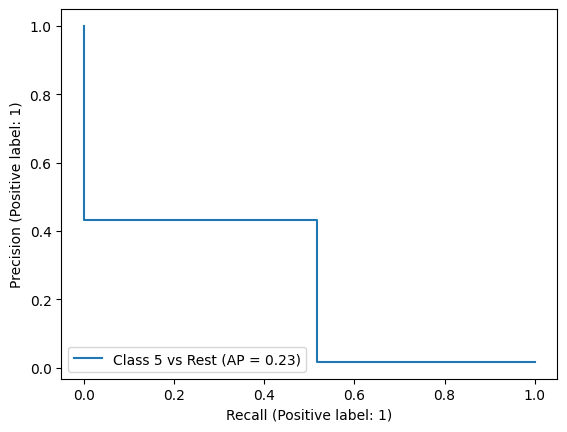

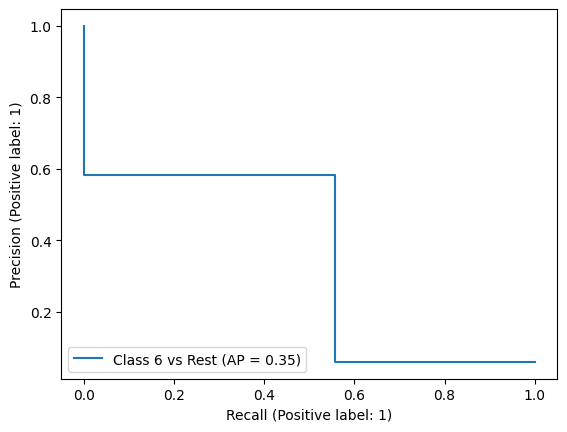

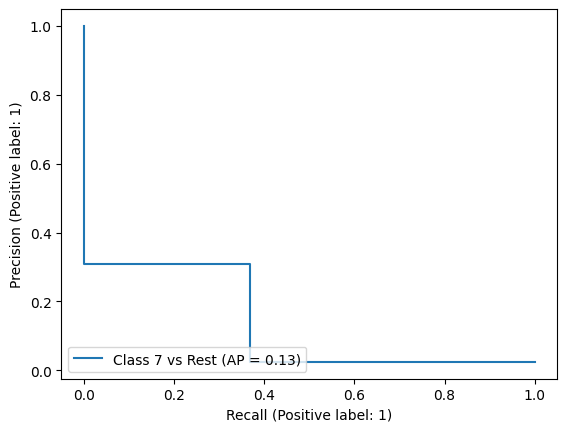

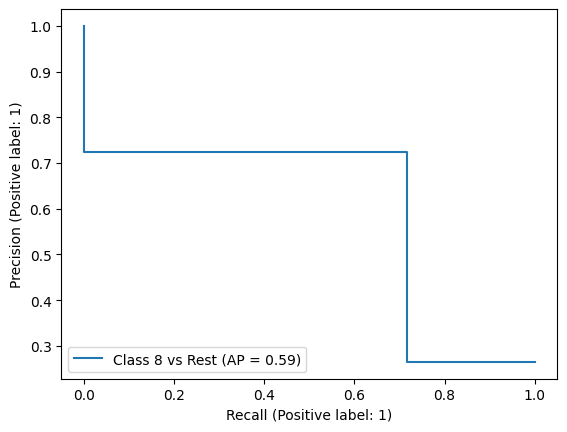

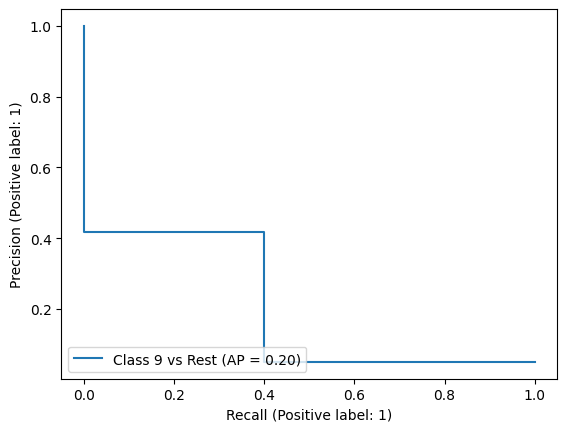

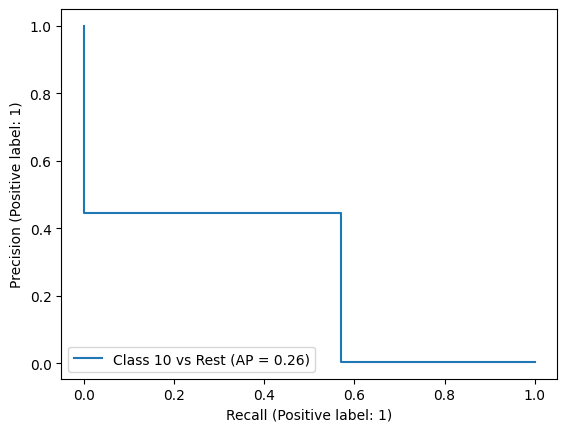

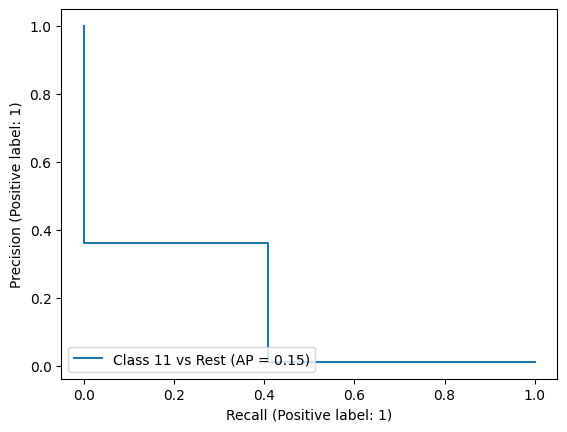

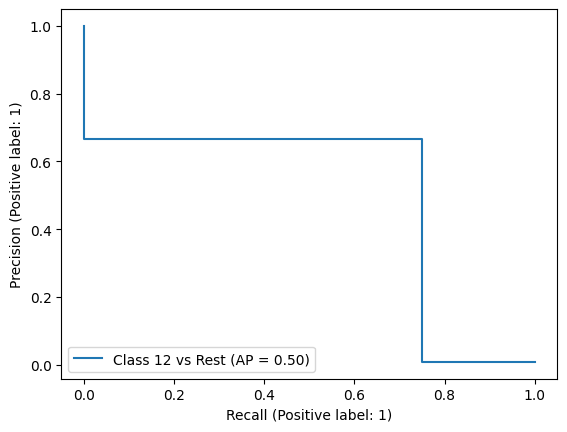

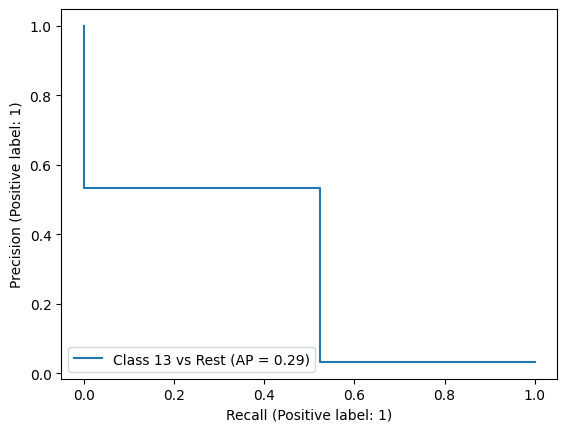

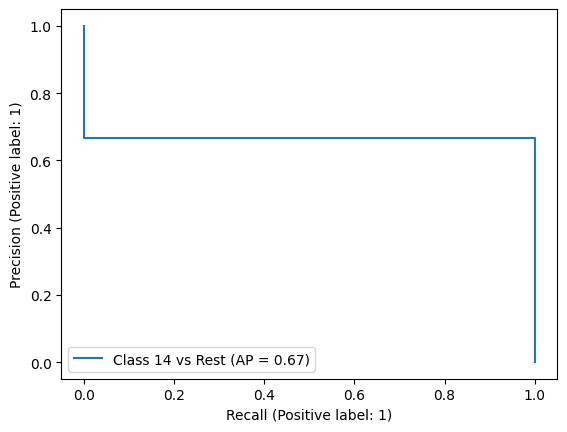

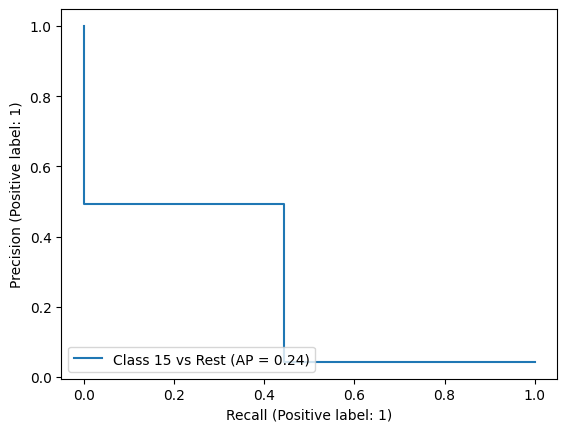

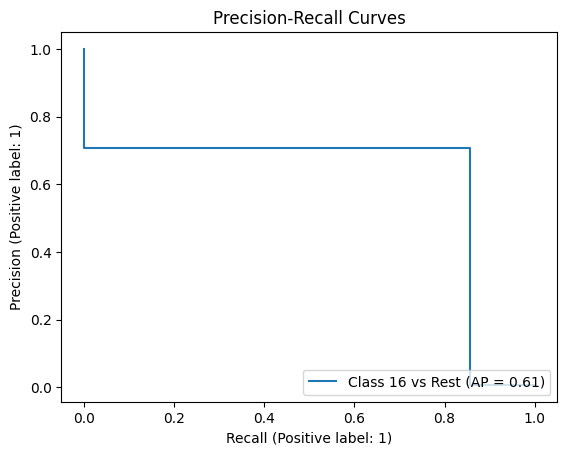

In [13]:
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt
import numpy as np

# Prepare test data
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Initialize progress bar for testing
with tqdm(total=len(X_test), desc="Testing Model") as test_pbar:
    y_pred = best_model.predict(X_test)
    test_pbar.update(len(X_test))

# Calculate and print the test F1 score
test_f1_score = f1_score(y_test, y_pred, average='macro')
print("Test F1 Macro Score: ", test_f1_score)

# Calculate and print additional metrics
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score: ", balanced_acc)

# Binarize the test labels for multi-class AUC calculations
y_test_bin = label_binarize(y_test, classes=range(17))
y_pred_bin = label_binarize(y_pred, classes=range(17))

# Calculate and print ROC-AUC score (one-vs-rest)
roc_auc = roc_auc_score(y_test_bin, y_pred_bin, average='macro', multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Calculate and print PRC-AUC score (one-vs-rest)
prc_auc = average_precision_score(y_test_bin, y_pred_bin, average='macro')
print("PRC-AUC Score: ", prc_auc)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Plot ROC-AUC Curves for each class
plt.figure(figsize=(10, 8))
for i in range(17):
    RocCurveDisplay.from_predictions(
        y_test_bin[:, i],
        y_pred_bin[:, i],
        name=f"Class {i} vs Rest"
    )
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random chance
plt.title("ROC-AUC Curves")
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall Curves for each class
plt.figure(figsize=(10, 8))
for i in range(17):
    PrecisionRecallDisplay.from_predictions(
        y_test_bin[:, i],
        y_pred_bin[:, i],
        name=f"Class {i} vs Rest"
    )
plt.title("Precision-Recall Curves")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Define your feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or 
                   col in ['zcr_mean', 'x', 'y', 'z']]
target_column = 'Order'

X_train = train_df[feature_columns]
y_train = train_df[target_column]

# Apply SMOTE to balance the training set
#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter space for Bayesian Optimization
param_space = {
    'max_depth': Integer(5, 20),
    'n_estimators': Integer(100, 600),
    'subsample': Real(0.3, 1.0),
    'gamma': Real(0, 0.5),
    #'colsample_bytree': Real(0.6, 1.0),
    #'colsample_bylevel': Real(0.6, 1.0),
    #'aplha': Real(0, 0.5),
    #'lambda': Real(1.0, 2.0),
    #'colsample_bytree': [0.6, 0.8, 1.0],
    #'colsample_bylevel': [0.6, 0.8, 1.0],
    #'alpha': [0, 0.1, 0.5],
    #'lambda': [1, 1.5, 2]
}


# Create the XGBClassifier model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=17, tree_method='hist', use_label_encoder=False, eval_metric='mlogloss')

# Set up Bayesian Optimization with BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='f1_macro',  # Use F1 macro to handle the imbalanced classes
    cv=3,
    n_iter=30,  # Increase for more comprehensive search
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the Bayesian optimization with SMOTE-balanced data
bayes_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters found: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

# Evaluate on the test set
#best_model = bayes_search.best_estimator_
#y_pred = best_model.predict(X_test)
#test_f1_score = f1_score(y_test, y_pred, average='macro')
#print("Test F1 Macro Score: ", test_f1_score)


In [ ]:
# Retrieve the best parameters from grid search
best_params = bayes_search.best_params_

# Create the best model
best_model = bayes_search.best_estimator_

# Set early stopping rounds
best_model.set_params(early_stopping_rounds=10)

# Prepare validation data
X_val = val_df[feature_columns]
y_val = val_df[target_column]

# Fit the model with early stopping, displaying a progress bar
evals = [(X_train, y_train), (X_val, y_val)]
for _ in tqdm(range(best_params['n_estimators'])):
    best_model.fit(X_train, y_train, eval_set=evals, verbose=False)


In [ ]:
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Evaluate on the test set
best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
test_f1_score = f1_score(y_test, y_pred, average='macro')
print("Test F1 Macro Score: ", test_f1_score)


In [ ]:
# Get predictions and calculate metrics
y_pred = best_model.predict(X_test)

# Calculate balanced accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy Score: ", balanced_acc)

# For multiclass ROC-AUC and PRC-AUC, binarize the output
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
y_pred_proba = best_model.predict_proba(X_test)

# Calculate ROC-AUC (One-vs-Rest approach for multiclass)
roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, average='macro', multi_class='ovr')
print("ROC-AUC Score: ", roc_auc)

# Calculate PRC-AUC (One-vs-Rest approach for multiclass)
precision = dict()
recall = dict()
prc_auc = dict()

for i in range(y_test_binarized.shape[1]):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    prc_auc[i] = auc(recall[i], precision[i])

# Average PRC-AUC across all classes
average_prc_auc = np.mean(list(prc_auc.values()))
print("PRC-AUC Score: ", average_prc_auc)

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix\nBalanced Accuracy: {balanced_acc:.4f}")
plt.show()

# ROC-AUC Curve Plot (Micro-average for multiclass ROC)
fig, ax = plt.subplots(figsize=(8, 6))
roc_display = RocCurveDisplay.from_predictions(y_test_binarized.ravel(), y_pred_proba.ravel(), name="Micro-average ROC-AUC")
roc_display.plot(ax=ax)
plt.title(f"ROC-AUC Curve\nROC-AUC Score: {roc_auc:.4f}")
plt.show()

# PRC-AUC Curve Plot (Micro-average for multiclass PRC)
fig, ax = plt.subplots(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test_binarized.ravel(), y_pred_proba.ravel())
prc_display = PrecisionRecallDisplay(precision=precision, recall=recall)
prc_display.plot(ax=ax)
plt.title(f"Precision-Recall Curve\nPRC-AUC Score: {average_prc_auc:.4f}")
plt.show()


In [4]:
# Define your feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or 
                   col in ['zcr_mean', 'x', 'y', 'z']]
target_column = 'Order'

X_train = train_df[feature_columns]
y_train = train_df[target_column]

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
) 
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Add sample weights to the training data
sample_weights = y_train.map(class_weights_dict)

# Define the parameter grid to search
#param_grid = {
#    'max_depth': [5, 10, 15],
#    'n_estimators': [350, 450, 550],
#    'subsample': [0.5, 0.75, 1.0],
#    'gamma': [0, 0.25, 0.5],
#}

param_grid = {
    'max_depth': [10, 15, 20],
    'n_estimators': [350, 450, 550],
    'subsample': [0.6, 0.75, 0.9],
    'gamma': [0, 0.25],
    #'colsample_bytree': [0.6, 0.8, 1.0],
    #'colsample_bylevel': [0.6, 0.8, 1.0],
    #'alpha': [0, 0.1, 0.5],
    #'lambda': [1, 1.5, 2]
}


# Create the model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=17)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid,
    scoring='f1_macro', 
    cv=3, 
    verbose=1, 
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters found:  {'gamma': 0, 'max_depth': 10, 'n_estimators': 450, 'subsample': 0.6}
Best cross-validation score:  0.4636357643091504


In [ ]:

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Add sample weights to the training data
sample_weights = y_train.map(class_weights_dict)

# Define your feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or 
                   col in ['zcr_mean', 'x', 'y', 'z']]
target_column = 'Order'

X_train = sample_train_df[feature_columns]
y_train = sample_train_df[target_column]

# Define the parameter grid to search
param_grid = {
    'max_depth': [10, 15, 20],
    'n_estimators': [350, 450, 550],
    'subsample': [0.3, 0.5, 0.7],
    'gamma': [0, 0.25],
    # Optional parameters you can add:
    # 'colsample_bytree': [0.6, 0.8, 1.0],
    # 'colsample_bylevel': [0.6, 0.8, 1.0],
    # 'alpha': [0, 0.1, 0.5],
    # 'lambda': [1, 1.5, 2]
}

# Create the model
model = xgb.XGBClassifier(objective='multi:softmax', num_class=17)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid,
    scoring='f1_macro', 
    cv=10, 
    verbose=1, 
    n_jobs=-1
)

# Fit the model with sample weights
grid_search.fit(X_train, y_train, sample_weight=sample_weights)

# Print the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


In [5]:
# Retrieve the best parameters from grid search
best_params = grid_search.best_params_

# Create the best model
best_model = create_model(**best_params)

# Set early stopping rounds
best_model.set_params(early_stopping_rounds=10)

# Prepare validation data
X_val = val_df[feature_columns]
y_val = val_df[target_column]

# Fit the model with early stopping, displaying a progress bar
evals = [(X_train, y_train), (X_val, y_val)]
for _ in tqdm(range(best_params['n_estimators'])):
    best_model.fit(X_train, y_train, eval_set=evals, verbose=False)


  0%|          | 0/450 [00:00<?, ?it/s]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:42:41] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
  0%|          | 1/450 [00:08<59:54,  8.00s/it]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:42:49] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
  0%|          | 2/450 [00:15<58:30,  7.84s/it]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:42:56] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
  1%|          | 3/450 [00:23<58:45,  7.89s/it]/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [13:43:04] WARNING: /workspace/src/context.cc:44: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserW

In [6]:
# Prepare test data
X_test = test_df[feature_columns]
y_test = test_df[target_column]

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# Calculate evaluation metrics
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
balanced_accuracy = balanced_accuracy_score(y_test, y_pred_test)

# For AUC-ROC, we need to binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro', multi_class='ovr')

# Print the evaluation metrics
print(f"Macro F1 Score: {macro_f1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")


Macro F1 Score: 0.4931
Balanced Accuracy: 0.4492
AUC-ROC: 0.9278


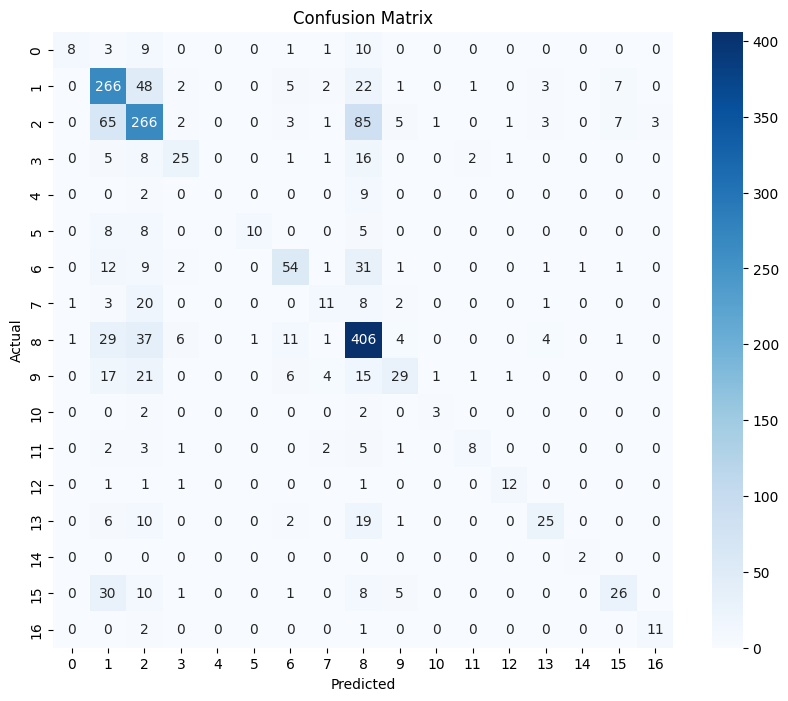

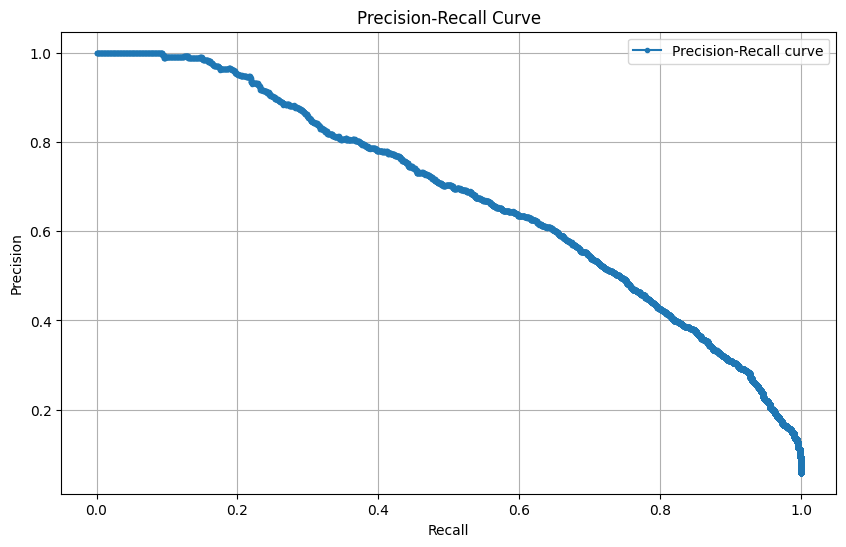

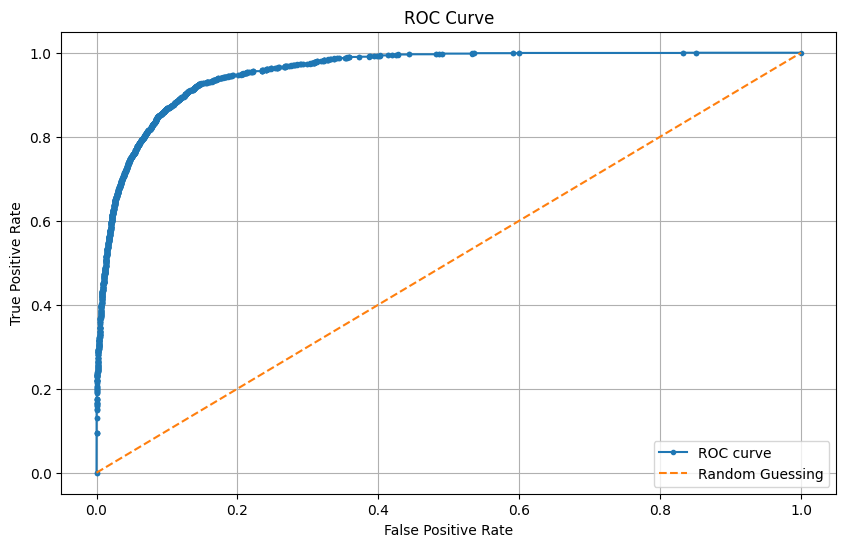

In [20]:
# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_proba.ravel())
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


In [ ]:
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assume train_df is your training DataFrame
# Define feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or 
                   col in ['zcr_mean', 'x', 'y', 'z']]
target_column = 'Order'

# Split into features and target
X_train = train_df[feature_columns]
y_train = train_df[target_column]

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter space for Bayesian Optimization
param_space = {
    'max_depth': Integer(5, 20),
    'n_estimators': Integer(100, 600),
    'subsample': Real(0.3, 1.0),
    'gamma': Real(0, 0.5),
    'learning_rate': Real(0.01, 0.3, prior='uniform'),  # Added learning rate
    'lambda': Real(0, 5)  # Added lambda (L2 regularization term)
}

# Initialize the base XGBClassifier model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=17,  # Number of classes
    tree_method='hist',  # Efficient tree method
    use_label_encoder=False,  # To avoid unnecessary label encoding warnings
    eval_metric='mlogloss'  # Evaluation metric
)

# Set up Bayesian Optimization with BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='f1_macro',  # Use F1 macro to handle the imbalanced classes
    cv=3,
    n_iter=30,  # Increase for more comprehensive search
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and score
print("Best parameters found: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

# After fitting, get feature importances
importances = bayes_search.best_estimator_.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top features based on importance
top_features = importance_df[importance_df['Importance'] > 0.01]  # Adjust threshold as needed
selected_feature_columns = top_features['Feature'].tolist()

# Optionally, create merged features or ratios
# Example: Creating a merged feature (modify as needed)
if 'mfcc_mean_1' in selected_feature_columns and 'mfcc_mean_2' in selected_feature_columns:
    X_train_smote['mfcc_merged'] = X_train_smote['mfcc_mean_1'] / X_train_smote['mfcc_mean_2']  # Example ratio

# Update the feature set to include selected features
X_train_smote = X_train_smote[selected_feature_columns + ['mfcc_merged']]  # Include new merged feature if created


In [ ]:
import xgboost as xgb
import pandas as pd
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Example feature merging/creating ratios (customize according to your analysis)
def create_aggregated_features(df):
    # Merging MFCC means and std to create a ratio feature as an example
    for i in range(1, 14):  # For MFCC features
        df[f'mfcc_ratio_{i}'] = df[f'mfcc_mean_{i}'] / (df[f'mfcc_std_{i}'] + 1e-6)  # Adding a small value to avoid division by zero

    # Other ratios or aggregated features can be added here
    # Example: Combine chroma features into a single feature (mean of means)
    df['chroma_mean_combined'] = df[[f'chroma_mean_{i+1}' for i in range(12)]].mean(axis=1)

    return df

# Define feature columns
feature_columns = [col for col in df.columns if col.startswith('mfcc') or 
                   col.startswith('chroma') or col.startswith('spectral') or 
                   col in ['zcr_mean', 'x', 'y', 'z']]
target_column = 'Order'

# Create aggregated features
train_df = create_aggregated_features(train_df)

# Split into features and target
X_train = train_df[feature_columns]
y_train = train_df[target_column]

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Define the parameter space for Bayesian Optimization
param_space = {
    'max_depth': Integer(5, 20),
    'n_estimators': Integer(100, 600),
    'subsample': Real(0.3, 1.0),
    'gamma': Real(0, 0.5),
    'learning_rate': Real(0.01, 0.3),  # Adding learning rate
    'lambda': Real(0, 10)  # Adding regularization parameter
}

# Initialize the base XGBClassifier model
model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=17,  # Number of classes
    tree_method='hist',  # Efficient tree method
    use_label_encoder=False,  # To avoid unnecessary label encoding warnings
    eval_metric='mlogloss'  # Evaluation metric
)

# Set up Bayesian Optimization with BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='f1_macro',  # Use F1 macro to handle the imbalanced classes
    cv=3,
    n_iter=30,  # Increase for more comprehensive search
    n_jobs=-1,
    verbose=1,
    random_state=42
)

bayes_search.fit(X_train_smote, y_train_smote)

# Print the best parameters and score
print("Best parameters found: ", bayes_search.best_params_)
print("Best cross-validation score: ", bayes_search.best_score_)

# Feature Importance
importance = bayes_search.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)


# Second Hierarachial level: Family

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/kaggle/input/birdclef/preprocessed_data.csv'
df = pd.read_csv(file_path)

# 'Family' is the main target for stratified splitting at the second level
target_column = 'Family'

# First split: Train (70%) and Temp (30%)
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df[target_column], random_state=42)

# Second split: Temp (30%) into Validation (15%) and Test (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df[target_column], random_state=42)

# Print the sizes to verify the splits
print(f"Train set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")
